### Scope: 
- Implementation of Autoencoders For MNIST Digits using Multi Layer Perceptron and as well as using LSTM Cell.
- Implementation of Tensorboard for Visualisation, Understanding as well as Tuning of Neural Network.
- Please note the above mentioned is implemented using Tensorflow.
- Please follow the below link if you want to use Tensorboard in anaconda how to activate and steps needed before implementation.
    - https://www.youtube.com/watch?v=-xnScueYpOc&list=PLantUT6vnC9BTLwFDFVMsAWbMHjoItkI-&index=20

In [1]:
# Importing Required Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import tensorboard
tf.__version__

C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vedant\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework

'1.14.0'

In [2]:
# Loading MNIST Digits
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Dividing the MNIST Digits data into Train and Validation
from sklearn.model_selection import train_test_split

Xtrain, Xvalidation, ytrain, yvalidation = train_test_split(x_train, y_train,stratify=y_train, random_state=42, test_size=0.2)
Xtrain.shape, Xvalidation.shape, ytrain.shape, yvalidation.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [4]:
Xtrain = Xtrain.reshape(-1, 784)
Xvalidation = Xvalidation.reshape(-1,784)

Xtrain = np.array(Xtrain)/255
Xvalidation = np.array(Xvalidation)/255

## NN Architecture
![alt text](NNArchitecture.png "Title")

#### Hyperparameters

In [5]:
inputShape = 784
outputShape = 784
memorySize = [32,32]
batchSize = 64
numberEpochs = 41
learningRate = 0.001

### Autoencoders using MLP
- Here we are implementing Autoencoder archietecture.  And that has two parts Encoder and Decoder. For Faster calculation, we are having Encoder and Decoder each has one Hidden layer, Hence our architecture will have one input layer two hidden layers and one output layer.
- Autoencoders are mainly used for feature selection and or Dimentionaliy reduction as the process goes from the input layer which in our example has 784 neurons which pass through the hidden layer which has 32 neurons so the inputs of 784 neurons (input information) are encoded into 32 neurons (32 feature information) these encoder outputs fed to the decoder which converts 32 feature to 784 features and feeds to the output layer. Once the network is trained and it has learned to generate output from 32 features we can directly use the encoder output for the further operation as its parameters (weight and biases as well as activation functions) are fully updated and capable of consisting of information 784 features into 32 features. 

In [6]:

tf.reset_default_graph()

# Defining Input
X = tf.placeholder(dtype=tf.float32, shape= [None, inputShape], name='Input_vector')

# Declaring Weights and Biases

WWs = {
    
    'WW1' : tf.Variable(tf.random_normal(shape=[inputShape, memorySize[0]], dtype=tf.float32), name='Weights_1'),
    'WW2' : tf.Variable(tf.random_normal(shape=[memorySize[0], memorySize[1]], dtype=tf.float32), name='Weights_2'),
    'WW3' : tf.Variable(tf.random_normal(shape=[memorySize[1], outputShape], dtype=tf.float32), name='Weights_3')
}

bbs = {
    'bb1' : tf.Variable(tf.random_normal(shape=[memorySize[0]], dtype=tf.float32), name='Biases_1'),
    'bb2' : tf.Variable(tf.random_normal(shape=[memorySize[1]], dtype=tf.float32), name='Biases_2'),
    'bb3' : tf.Variable(tf.random_normal(shape=[outputShape], dtype=tf.float32), name='Biases_3')
}


#tensorboard histograms on summary operations
Weights_1 = tf.summary.histogram("Weights_1",WWs['WW1'])
Biases_1 = tf.summary.histogram("Biases_1",bbs['bb1'])
#tensorboard histograms on summary operations
Weights_2 = tf.summary.histogram("Weights_2",WWs['WW2'])
Biases_2 = tf.summary.histogram("Biases_2",bbs['bb1'])
#tensorboard histograms on summary operations
Weights_3 = tf.summary.histogram("Weights_3",WWs['WW3'])
Biases_3 = tf.summary.histogram("Biases_3",bbs['bb1'])

In [7]:
WWs['WW1'],WWs['WW2'],WWs['WW3'],bbs['bb1'],bbs['bb2'],bbs['bb3']

(<tf.Variable 'Weights_1:0' shape=(784, 32) dtype=float32_ref>,
 <tf.Variable 'Weights_2:0' shape=(32, 32) dtype=float32_ref>,
 <tf.Variable 'Weights_3:0' shape=(32, 784) dtype=float32_ref>,
 <tf.Variable 'Biases_1:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'Biases_2:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'Biases_3:0' shape=(784,) dtype=float32_ref>)

In [8]:
layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X,WWs['WW1']), bbs['bb1']))
layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, WWs['WW2']),bbs['bb2']))
outPut = tf.nn.sigmoid(tf.add(tf.matmul(layer2, WWs['WW3']), bbs['bb3']))
layer1.shape,layer2.shape,outPut.shape

(TensorShape([Dimension(None), Dimension(32)]),
 TensorShape([Dimension(None), Dimension(32)]),
 TensorShape([Dimension(None), Dimension(784)]))

In [9]:
trueOutPut = tf.placeholder(dtype=tf.float32, shape=[None, outputShape])
loss = tf.reduce_mean(tf.square(outPut - trueOutPut))
optimizer = tf.train.AdamOptimizer(learning_rate= learningRate).minimize(loss)

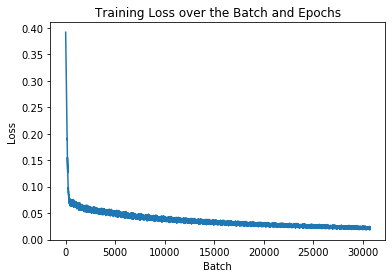

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter(".\logs", sess.graph)

sess.run(init)
epochLoss = []
for epoch in range(numberEpochs):
    for i in range(Xtrain.shape[0]//batchSize):
        Xbatch = Xtrain[i*batchSize:(i+1)*batchSize,:]
        predict, c = sess.run([optimizer, loss], feed_dict = { X: Xbatch, trueOutPut: Xbatch})
        epochLoss.append(c)
        
        summaryWeights_1 = sess.run(Weights_1)
        summaryWeights_2 = sess.run(Weights_2)
        summaryWeights_3 = sess.run(Weights_3)
        summaryBiases_1 = sess.run(Biases_1)
        summaryBiases_2 = sess.run(Biases_3)
        summaryBiases_3 = sess.run(Biases_3)

        writer.add_summary(summaryWeights_1, i)
        writer.add_summary(summaryWeights_2, i)
        writer.add_summary(summaryWeights_3, i)
        writer.add_summary(summaryBiases_1, i)
        writer.add_summary(summaryBiases_2, i)
        writer.add_summary(summaryBiases_3, i)

# Plotting Training Loss        
plt.plot(epochLoss)
plt.title('Training Loss over the Batch and Epochs')
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.show()

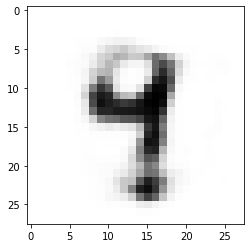

In [11]:
# Generated Image
randomRow = np.random.randint(0, high= Xvalidation.shape[0])
anyImage = Xvalidation[randomRow,:]
ouImage = sess.run(outPut, feed_dict= {X : [anyImage]})
plt.imshow(ouImage.reshape(28,28), cmap='Greys')
plt.show()

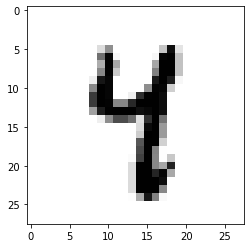

In [12]:
# Actual Image
plt.imshow(anyImage.reshape(28,28), cmap='Greys')
plt.show()

In [13]:
sess.close()

### Implementation of Autoencoders Using LSTM

#### Hyperparameters

In [14]:
inputShape = 784
outputShape = 784
memorySize = [32,32]
batchSize = 64
numberEpochs = 1
learningRate = 0.001

In [15]:
tf.reset_default_graph()

# Defining Input
# LSTM cell requires 3D input
XX = tf.placeholder(dtype=tf.float32, shape= [None, inputShape, 1], name='Input_vector')

# Declaring Weights and Biases for fully connected layer (decoder and output layer)

WWs = {

    'WW' : tf.Variable(tf.random_normal(shape=[memorySize[1], 1], dtype=tf.float32, stddev=0.1), name='Weights_3')
}

bbs = {

    'bb' : tf.Variable(tf.random_normal(shape=[1], dtype=tf.float32, stddev=0.1), name='Biases_3')
}

#tensorboard histograms on summary operations
Weights = tf.summary.histogram("Weights",WWs['WW'])
Biases = tf.summary.histogram("Biases",bbs['bb'])

In [16]:
def lstmStack(Nneurons):
    with tf.variable_scope('LSTMCell'):
        cells = []
        for kk, Nneuron in enumerate(Nneurons):
            with tf.variable_scope('RNN_{}'.format(kk)):
                cells.append(tf.nn.rnn_cell.LSTMCell(num_units=Nneuron, activation=tf.nn.sigmoid))
        stack = tf.nn.rnn_cell.MultiRNNCell(cells)
        return stack
# or    
# lstmCell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.LSTMCell(num_units = 32, activation=tf.nn.relu), output_keep_prob=0.7) for _ in range(2)])


In [17]:
lstmCell = lstmStack(Nneurons= [memorySize[0],memorySize[1]])

outputs, states = tf.nn.dynamic_rnn(lstmCell, XX, dtype=tf.float32)
outPut = tf.nn.sigmoid(tf.add(tf.matmul(outputs, WWs['WW']), bbs['bb']))

trueOutPut = tf.placeholder(dtype=tf.float32, shape=[None, outputShape, 1])
loss = tf.reduce_mean(tf.square(outPut - trueOutPut))
optimizer = tf.train.AdamOptimizer(learning_rate= learningRate).minimize(loss)
Xtrain = Xtrain.reshape(-1,inputShape,1)
Xvalidation = Xvalidation.reshape(-1,outputShape,1)

costAttempt = tf.summary.scalar("cost", loss)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


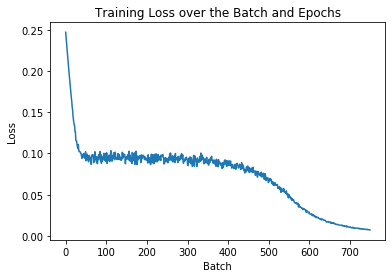

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter("c:\logs", sess.graph)

sess.run(init)
epochLoss = []
mm = 0
for epoch in range(numberEpochs):
    for i in range(Xtrain.shape[0]//batchSize):
        Xbatch = Xtrain[i*batchSize:(i+1)*batchSize,:,:]
        predict, c = sess.run([optimizer, loss], feed_dict = { XX: Xbatch, trueOutPut: Xbatch})
        epochLoss.append(c)

        summaryWeights = sess.run(Weights)
        summaryBiases = sess.run(Biases)
        summaryCost = sess.run(costAttempt, feed_dict={ XX: Xbatch, trueOutPut: Xbatch})

        writer.add_summary(summaryWeights, i)
        writer.add_summary(summaryBiases, i)
        writer.add_summary(summaryCost, i)
# Plotting Training Loss        
plt.plot(epochLoss)
plt.title('Training Loss over the Batch and Epochs')
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.show()

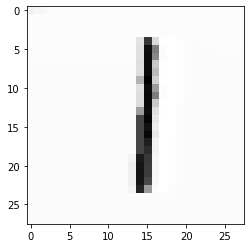

In [19]:
# Generated Image from Autoencoders
randomRow = np.random.randint(0, high= Xvalidation.shape[0])
anyImage = Xvalidation[randomRow,:,:]
ouImage = sess.run(outPut, feed_dict= {XX : [anyImage]})
plt.imshow(ouImage.reshape(28,28), cmap='Greys')
plt.show()

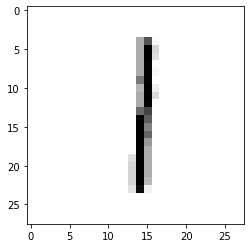

In [20]:
# Actual Image
plt.imshow(anyImage.reshape(28,28), cmap='Greys')
plt.show()

In [21]:
sess.close()